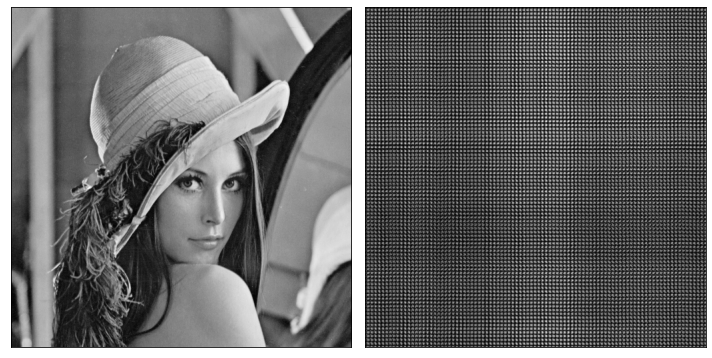

In [3]:
# 在信噪比未知，信噪比已知，图像和噪声自相关函数已知的情况下实现维纳滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2
from scipy.signal import wiener
from scipy.signal import gaussian, convolve2d

img = cv2.imread('./lena.png')
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height = grayImage.shape[0]
width = grayImage.shape[1]

def blur(img, kernel_size = 3):
    dummy = np.copy(img)
    h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

blurred_img = blur(grayImage, kernel_size = 7)
noisy_img = add_gaussian_noise(blurred_img, sigma = 25)

# 信噪比未知
kernel = gaussian_kernel(5)
result = wiener_filter(noisy_img, kernel, K = 0)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

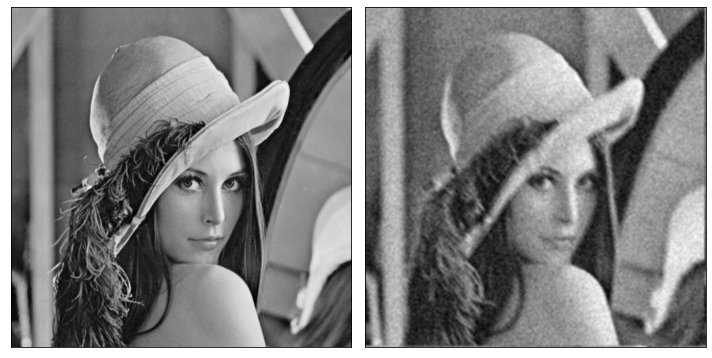

In [4]:
# 信噪比已知
kernel = gaussian_kernel(5)
result = wiener_filter(noisy_img, kernel, K = 5)

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()

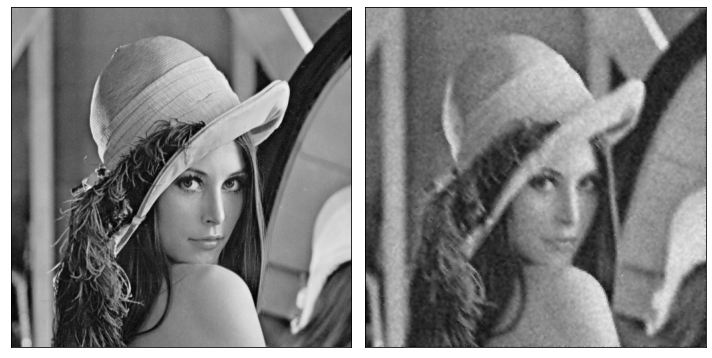

In [5]:
# 图像和噪声自相关函数已知
result = wiener(noisy_img, (5, 5))

plt.figure(figsize=(10, 12))
plt.subplot(121), plt.imshow(grayImage, 'gray'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(result, 'gray'), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()